# Validation of MFE forcing generation

Some quicklooks to make sure that the preprocessing of ERA5-land and running of MFE are done correctly to generate the input to WRF-Hydro from ERA5-land data.

In [1]:
# It seems there is no need to do this anymore in VS Code Insiders - 06/10/2021
%config InlineBackend.figure_format='png'
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as crs

## Basic Plots

- The topography we used in our WRF runs vs. the topography used in ERA5-land

- Basic comparisons of the surface air temperature, downward surface shortwave radiation, downward surface longwave radiation and surface rainrate


In [3]:
fc = Dataset('../era5-land/no_lake_data/ecmf_20180801_fc_sfc_unpacked.nc')
mfe_in = Dataset('../mfe_input/era5land.hourly.2018080112.nc')
mfe_out = Dataset('../wrfhydro_forcing/2018080100/201808011200.LDASIN_DOMAIN2')
era5 = Dataset('../mfe_input/hgt.nc')
geogrid = Dataset('../geogrid/geo_em.d02.nc')

In [4]:
print(mfe_in.variables.keys())
print(mfe_out.variables.keys())

dict_keys(['longitude', 'latitude', 'time', 'T2D', 'Q2D', 'U10', 'V10', 'PRES', 'RAINRATE', 'DSWRF', 'DLWRF'])
dict_keys(['time', 'reference_time', 'U2D', 'V2D', 'LWDOWN', 'RAINRATE', 'T2D', 'Q2D', 'PSFC', 'SWDOWN', 'LQFRAC'])


In [5]:
wrf_lats = geogrid['XLAT_M'][0,:,:]
wrf_lons = geogrid['XLONG_M'][0,:,:]
era5_lons, era5_lats = np.meshgrid(mfe_in['longitude'], mfe_in['latitude'])

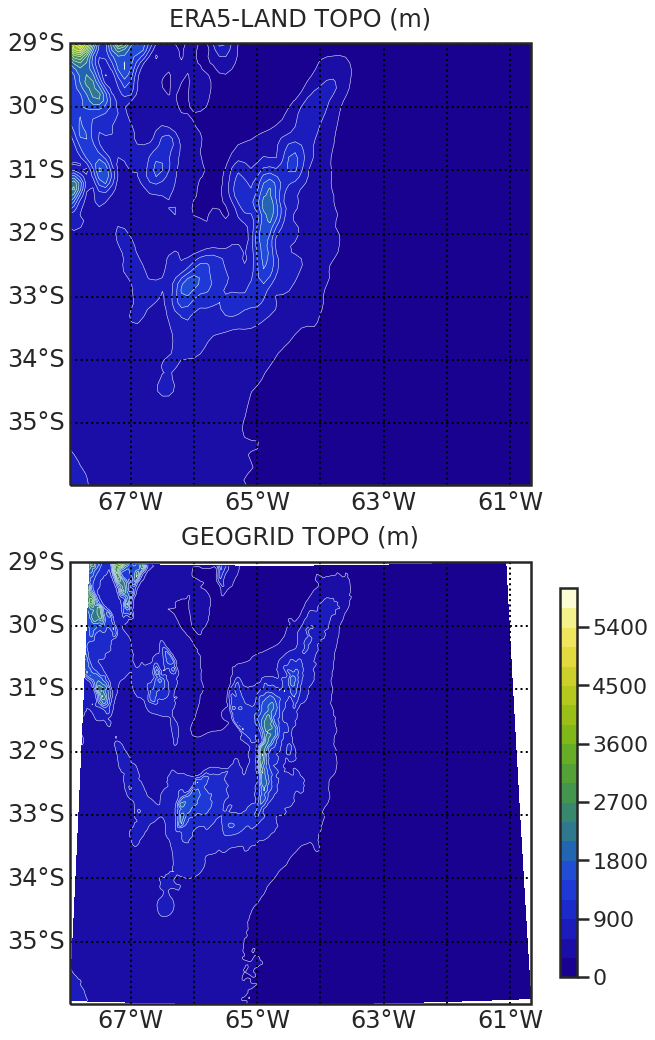

In [6]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

levs = np.arange(0., 6001., 300.)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=levs,
            linewidths = 0.5,
            colors="white")
ct = ax1.contourf(wrf_lons, wrf_lats,  geogrid['HGT_M'][0, :,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.bgyw)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('GEOGRID TOPO (m)')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(era5_lons, era5_lats, era5['hgt'][0, :,:],
            levels=levs,
            linewidths = 0.5,
            colors="white")
ax2.contourf(era5_lons, era5_lats, era5['hgt'][0, :,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.bgyw)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('ERA5-LAND TOPO (m)')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

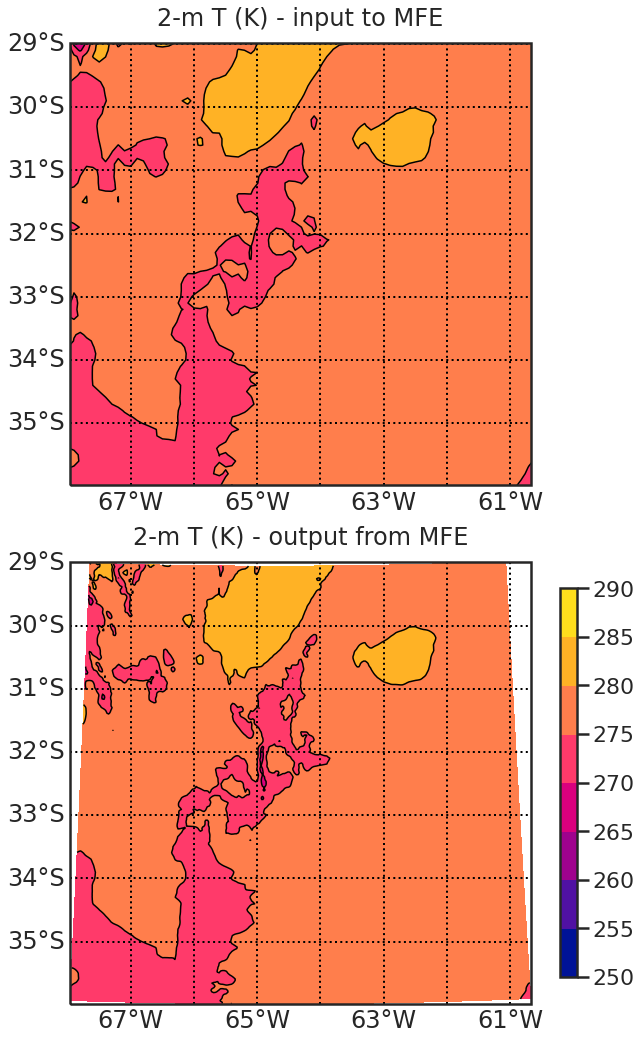

In [7]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

levs = np.arange(250., 291., 5.)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, mfe_out['T2D'][0, :,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  mfe_out['T2D'][0, :,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.bmy)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('2-m T (K) - output from MFE')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(era5_lons, era5_lats, mfe_in['T2D'][0, :,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(era5_lons, era5_lats, mfe_in['T2D'][0, :,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.bmy)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('2-m T (K) - input to MFE')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

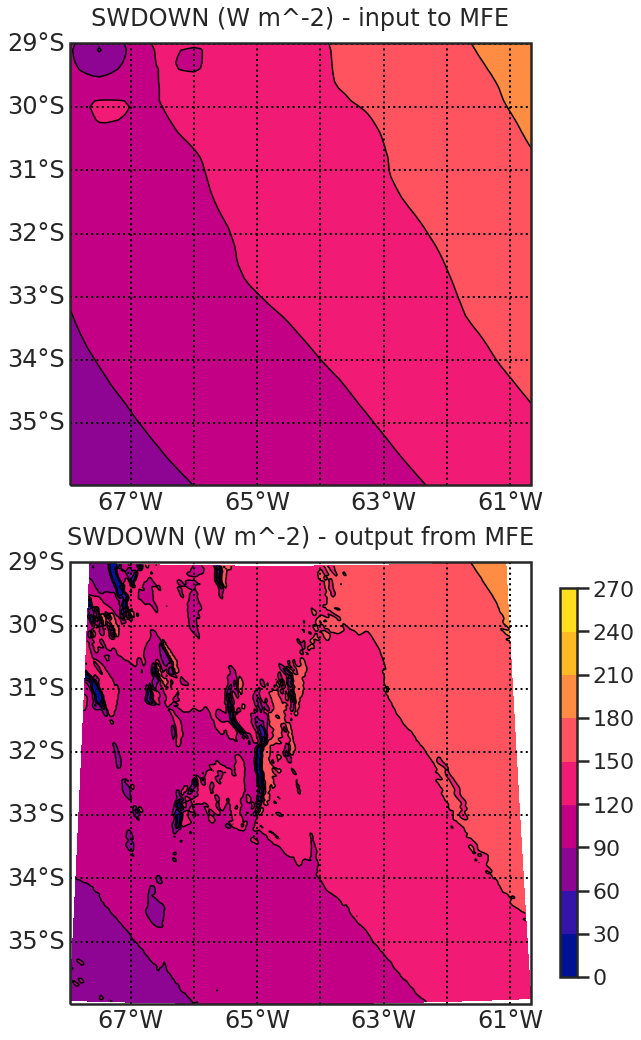

In [8]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

levs = np.arange(0., 271., 30.)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, mfe_out['SWDOWN'][0, :,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  mfe_out['SWDOWN'][0, :,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.bmy)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('SWDOWN (W m^-2) - output from MFE')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(era5_lons, era5_lats, mfe_in['DSWRF'][0, :,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(era5_lons, era5_lats, mfe_in['DSWRF'][0, :,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.bmy)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('SWDOWN (W m^-2) - input to MFE')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

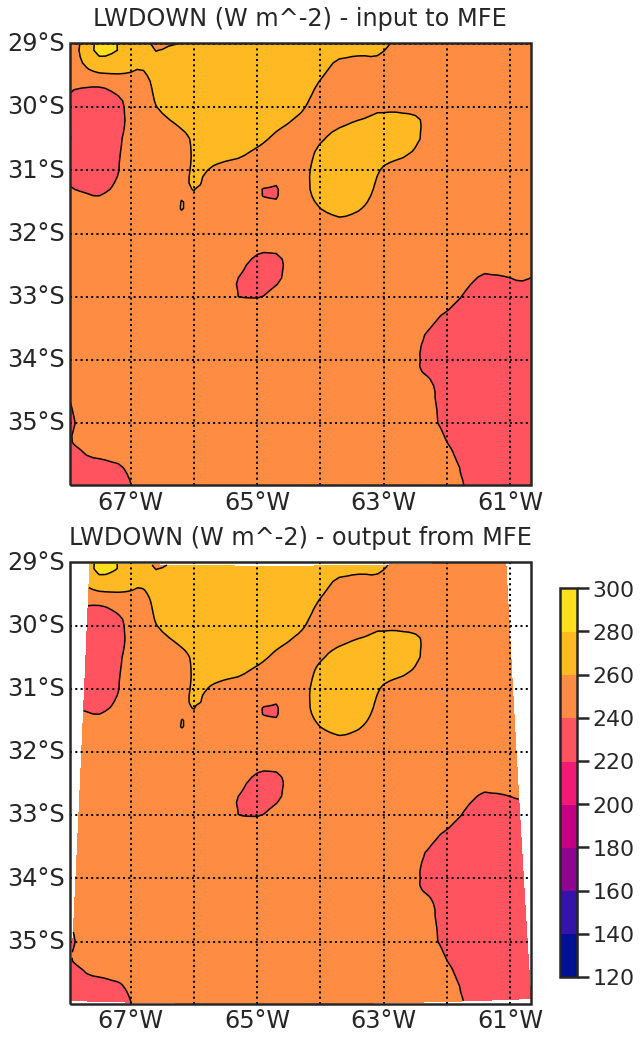

In [9]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

levs = np.arange(120., 301., 20.)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, mfe_out['LWDOWN'][0, :,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  mfe_out['LWDOWN'][0, :,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.bmy)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('LWDOWN (W m^-2) - output from MFE')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(era5_lons, era5_lats, mfe_in['DLWRF'][0, :,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(era5_lons, era5_lats, mfe_in['DLWRF'][0, :,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.bmy)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('LWDOWN (W m^-2) - input to MFE')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

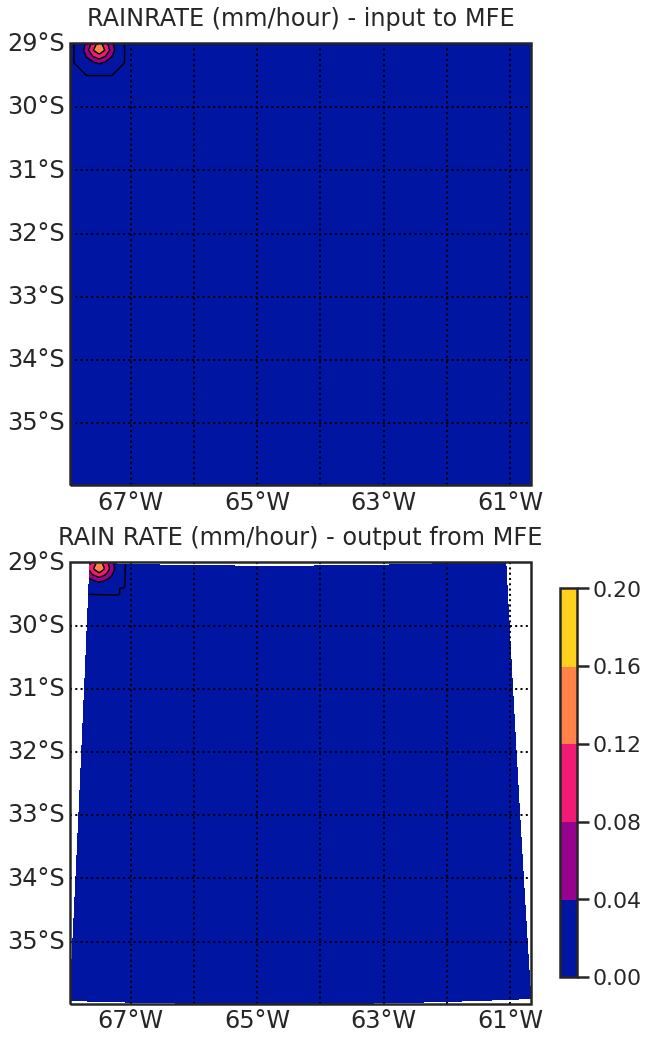

In [10]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

conversion = 3600.0
levs = np.arange(0., 0.21, 0.04)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, mfe_out['RAINRATE'][0, :,:]*conversion,
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  mfe_out['RAINRATE'][0, :,:]*conversion,
            levels=levs,
            extend='neither',
            cmap=cc.cm.bmy)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('RAIN RATE (mm/hour) - output from MFE')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(era5_lons, era5_lats, mfe_in['RAINRATE'][0, :,:]*conversion,
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(era5_lons, era5_lats, mfe_in['RAINRATE'][0, :,:]*conversion,
            levels=levs,
            extend='neither',
            cmap=cc.cm.bmy)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('RAINRATE (mm/hour) - input to MFE')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()